<a href="https://colab.research.google.com/github/AleCongi/One-Night-Icon/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingegneria della Conoscenza
Università degli studi di Bari "Aldo Moro", Dipartimento di Informatica.

Il seguente notebook è stato elaborato degli studenti:


*   Congedo Alessandro (mat. 677315)
*   Romano Andrea (mat. 735541)

Il progetto che presentiamo è un esempio di come l'IA possa essere utilizzata per classificare eventi in base a descrizioni e categorie.

---



L'obiettivo di questo studio è quello di sviluppare un sistema di apprendimento automatico che sia in grado di rappresentare la conoscenza sia a basso livello che ad alto livello, garantendo una gestione d'incertezza.

Il progetto è stato condotto nell'ottica di arricchire il precedente lavoro dei [**BroUsers**](https://www.instagram.com/bro__users) chiamato [**OneNight**](https://t.me/wannight_bot), un **bot Telegram** che raccoglie informazioni sugli eventi in una determinata zona geografica.

---
L'esigenza di una filtrazione ulteriore degli eventi mediante delle categorie prestabilite si configura come una nuova espansione del progetto.

La passione che abbiamo per il nostro lavoro, sia quello sviluppato in passato che quello presentato, ci ha spinto a esplorare nuove soluzioni e a sviluppare un sistema che possa fornire un contributo significativo alla comunità.

**Indice delle sezioni:**


*   **A**: *CARICAMENTO E FIX DEL DATASET*
  * **A1**: *PLOT DEL DATASET*
*   **B**: *PREPROCESS DELLE DESCRIZIONI*
  * **B1**: *FUNZIONI PREPROCESSING*
  * **B2**: *PREPROCESSING*
  * **B3**: *TOKENIZATION, SEQUENCING & PADDING*
  * **B4**: *RAPPRESENTAZIONE DEL TESTO A BASSO LIVELLO*
      * **B4.1** *ALTERNATIVA EMBEDDINGS VIA WORLD2VEC*
      * **B4.2** *ALTERNATIVA FEATURE EXTRACTION VIA RETE NEURALE*
      * **B4.3** *ALTERNATIVA VECTORIZATION VIA TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY*
*   **C**: *CLASSIFICAZIONE*
  * **C1**: *SPLIT*
      * **C1.1**: *RIDUZIONE*
  * **C2**: *CLASSIFICATORI*
      * **C2.1**: *VARIOUS PLOTS*
  * **C3**: TRASFORMAZIONE DATASET IN VALORI DISCRETI
*   **D**: *RETE NEURALE*
*   **E**: *LOGICHE FUZZY*
*   **F**: *RAPPRESENTAZIONE DELLA CONOSCENZA*
  * **F1**: *ONTOLOGIA: WORDNET*
  * **F2**: *RECOMMENDER SYSTEM CONTENT-BASED*



In [ ]:
!pip install nltk
!pip install scikit-multilearn
!pip install scikit-fuzzy
!pip install fuzzywuzzy
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 862.3 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1b845dfc84b7ae607add905fa6e316664ecbf30454e3f2ea335f3ed9d99192a1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

import pandas as pd

import seaborn as sns

from re import sub as sub

import matplotlib.pyplot as plt

import string

import networkx as nx

from operator import pos

import random

import pickle

import gensim.downloader as api

from sys import exit as exit
import sys

import numpy as np
from numpy.ma.core import outer
from numpy import mean
from numpy import std

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as dl
from nltk import word_tokenize as tkn
from nltk import pos_tag

import stanza
from stanza.pipeline.processor import Processor

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput  import  ClassifierChain
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances,accuracy_score, average_precision_score, f1_score, hamming_loss, label_ranking_average_precision_score, precision_recall_curve, recall_score, classification_report, r2_score
from sklearn.utils import class_weight
from sklearn.metrics.pairwise import cosine_similarity

from skmultilearn.problem_transform import LabelPowerset

dl('wordnet')
dl('omw-1.4')
dl('punkt')
dl('stopwords')
dl('averaged_perceptron_tagger')
dl('tagsets')
stanza.download('it')

drive.mount('/content/drive', force_remount=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


INFO:stanza:Downloading default packages for language: it (Italian) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


Mounted at /content/drive


##**A**: *CARICAMENTO E FIX DEL DATASET*

In [ ]:
tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventi.csv')
tot.head(10)

,culture,music,food,fun,id,text
0,0,0,0,1,1000187186721956,Martedi 05 gennaio super tombolata al Barfly!\...
1,0,1,0,1,100731190460200,"Ingresso free senza obbligo di consumazione,se..."
2,1,1,0,1,1014507045355357,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
3,1,1,0,1,1015563648832823,yn e lieta di presentare\n\nNapoolyn x Resilie...
4,0,0,0,1,1021806692027608,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
5,1,1,1,1,1023358881203820,Quest'anno in occasione di san Valentino il ri...
6,1,1,0,1,103006560538403,La 1 Esposizione dei disegni di DIPSTER accomp...
7,1,1,0,1,1033389857374299,LELIO MORRA e tornato a suonare in giro\n\nha ...
8,1,0,0,1,1033660330389424,Largo alla beneficenza! Per iniziare al megli...
9,1,1,0,1,1034778187923694,L'evento piu internazionale a Napoli! L Aperil...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


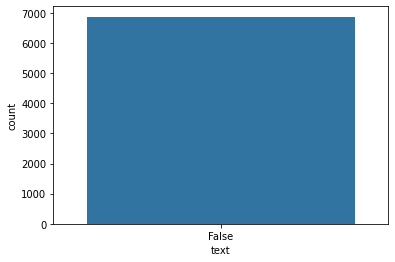

In [ ]:
sns.countplot((tot["text"] == None))

Sapendo che "id" è la nostra colonna primaria, controllo che il numero di valori unici nella colonna primaria sia uguale al numero di righe. Questo mi permette di accertarmi di non avere la stessa riga per più di una volta nel mio dataset.

In [ ]:
tot['id'].nunique() == len(tot['id'])

False

In [ ]:
tot = tot.drop_duplicates(subset="id", keep='last')
tot = tot.drop_duplicates(subset="text", keep='last')

for index, row in tot.iterrows():  
  try:
    trashId = row['id']
    trash = row['text'].lower()
  except AttributeError as ae:
    tot.drop(tot[tot['id'] == trashId].index, inplace=True)

In [ ]:
tot['id'].nunique() == len(tot['id'])

True

In [ ]:
tot=tot.reset_index(drop=True)

In [ ]:
tot.count()

culture    6053
music      6053
food       6053
fun        6053
id         6053
text       6053
dtype: int64

###**A1**: *PLOT DEL DATASET*

In [ ]:
def getRandomIndex(df):
  return random.randint(0, len(df) - 1)

getRandomIndex(tot)

77

Ecco i primi elementi del dataset.

In [ ]:
tot

,culture,music,food,fun,id,text
0,0,0,0,1,1000187186721956,Martedi 05 gennaio super tombolata al Barfly!\...
1,0,1,0,1,100731190460200,"Ingresso free senza obbligo di consumazione,se..."
2,1,1,0,1,1014507045355357,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
3,1,1,0,1,1015563648832823,yn e lieta di presentare\n\nNapoolyn x Resilie...
4,0,0,0,1,1021806692027608,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
...,...,...,...,...,...,...
6048,1,1,0,0,996956944037551,Hot Club Roma Trio\n\nMoreno Viglione chitarra...
6049,1,0,0,0,997255064998935,"Presentazione del libro:\n ""Tasmania"" (Einaudi..."
6050,1,1,0,0,997824980996408,In occasione delle GIORNATE EUROPEE DEL PATRIM...
6051,1,0,0,1,998364400508276,Vieni a Danzare gratuitamente per un giorno co...


In [ ]:
tot.dtypes

culture     int64
music       int64
food        int64
fun         int64
id          int64
text       object
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


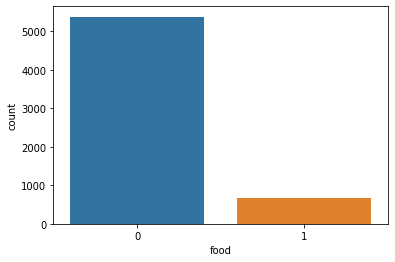

In [ ]:
sns.countplot(tot['food'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


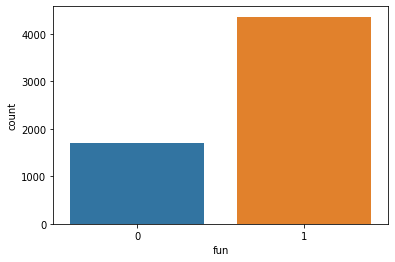

In [ ]:
sns.countplot(tot['fun'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


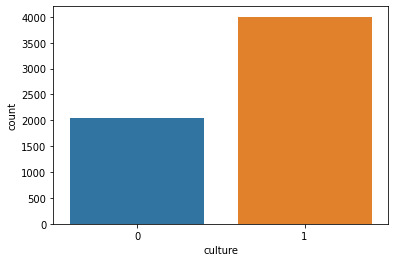

In [ ]:
sns.countplot(tot['culture'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


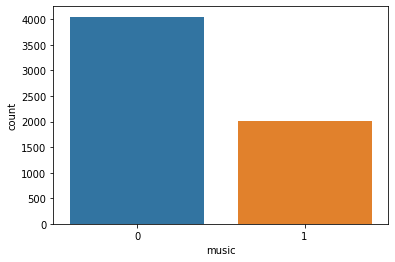

In [ ]:
sns.countplot(tot['music'])

##**B**: *PREPROCESS DELLE DESCRIZIONI*

###**B1**: *FUNZIONI PREPROCESSING*

In [ ]:
def remove_numbers(input_string):
    # Crea una tabella di traduzione che mappa tutti i numeri a None
    translate_table = input_string.maketrans("", "", string.digits)
    # Utilizza la tabella di traduzione per rimuovere tutti i numeri
    return input_string.translate(translate_table)

def remove_punctuation(input_string):
    for char in string.punctuation:
          input_string = input_string.replace(char, " ")
    return input_string

stnzPipe = stanza.Pipeline(lang='it', processors='tokenize,pos')

def remove_non_N_V(input_string):
    doc = stnzPipe(input_string)
    tagged_words = [word.text for sent in doc.sentences for word in sent.words if word.upos in ['NOUN', 'VERB']]
    return ' '.join(tagged_words)

def remove_non_N_V_ENG(input_string):
    words = tkn(input_string)
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP','VBZ']]
    return ' '.join(nouns)

def preProcessDescription(description, stopwordsTotali, maxSeqLen = None,tokenizer = None, lang = 'ita'):
  splitted = remove_punctuation(remove_numbers(description.lower())).split()
  parole_filtrate = [parola for parola in splitted if not parola in stopwordsTotali]
  descrizione = " ".join(parole_filtrate)
  if lang == 'ita':
    descrizione_filtrata = remove_non_N_V(descrizione)
  elif lang == 'eng':
    descrizione_filtrata = remove_non_N_V_ENG(descrizione)
  if (maxSeqLen is None or tokenizer is None):
    input_data = descrizione_filtrata
  else:
    input_data = tokenizer.texts_to_sequences([descrizione_filtrata])
    input_data = pad_sequences(input_data, maxlen=maxSeqLen,padding='post')
    original_description = ""
    for i, word in enumerate(input_data[0]):
      if word == 1:
        for key, value in tokenizer.word_index.items():
          if value == i :
            original_description += key + " "
    print('Traduzione della sequenza numero in parole: ')
    print(original_description)
  return input_data

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| pos       | combined |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


Wordnet Ontology Functions

In [ ]:
#Wordnet

def get_syns(description):
  test=[]
  words = tkn(description)
  for every in words:
    if (every not in stopwordsTotali):
      if(wn.synsets(every, lang ='ita') == []):
        
          test.append(wn.synsets(every))
      else:
        
          test.append(wn.synsets(every, lang ='ita'))
      #print('parola iniziale: ',every)
      #print('synset: ',wn.synsets(every, lang ='ita'))
  lemmatizer = WordNetLemmatizer()
  out =[]
  for each in range(len(test)):
    for q in range(len(test[each])):
      wordToAdd=lemmatizer.lemmatize(test[each][q].name().split('.')[0])
      out.append(wordToAdd)
      if(q==1):
        #print(out)
        break
  #out=test
  out=list(set(out))
  return out

def reduced_description(description):
    # Tokenize the description
    tokens = tkn(description)
    # Reduce the words to their most common synset
    reduced_description = []
    for token in tokens:
      try:
          synset = wn.synsets(token, lang='ita',pos=wn.NOUN)
          if(synset == []):
            synset = wn.synsets(token, lang='ita',pos=wn.VERB)
            if(synset == []):
              synset = wn.synsets(token, lang='eng',pos=wn.NOUN)
              if(synset == []):
                synset = wn.synsets(token, lang='eng',pos=wn.VERB)  
          lemma = max(synset[0].lemmas(), key=lambda x: x.count()).name()
          reduced_description.append(lemma)
      except:
          continue
    return list(set(reduced_description))


def predict_closest_clusters(df, description, km, X, vectorizerTfIdf):

    description=reduced_description(description)

    newWords = ''
    
    for each in description:
      newWords = newWords + ' ' + each
    description=newWords

    # Transform the input description into a tf-idf representation
    input_tfidf = vectorizerTfIdf.transform([description])

    # Calculate the distances between the input and each of the 10 clusters
    cluster_distances = km.transform(input_tfidf).flatten()

    # Get the index of the closest cluster
    closest_cluster_index = np.argmin(cluster_distances)

    print("Il cluster più vicino è il cluster numero: ", closest_cluster_index)

    terms = vectorizerTfIdf.get_feature_names()
    top_ten_words = [terms[ind] for ind in order_centroids[closest_cluster_index, :5]]
    print("Le sue parole più rilevanti sono: {}".format(', '.join(top_ten_words)))
    
    # Calculate the distances between the input and each sample in X
    sample_distances = pairwise_distances(input_tfidf, X).flatten()
    # Get the indices of the 5 closest samples
    closest_sample_indices = sample_distances.argsort()
    print("I 5 eventi più importanti nel dataset sono:")
    count = 0
    for i in closest_sample_indices: 
      if (len(df['text'][i]) > 100):
        print(df['text'][i])
        count = count + 1
      if (count == 5):
        break

###**B2**: *PREPROCESSING*

In [ ]:
stp = open("/content/drive/MyDrive/Colab Notebooks/stopwordsita.txt", "r")
data = stp.read().split("\n")
stp.close()
stopwordsTotali = stopwords.words('italian') + stopwords.words('english') + data
stopwordsTotali = list(set(stopwordsTotali).union(['il', 'lo', 'la', 'i', 'gli', 'le', 'una', 'un', 'uno', 'di', 'a', 'da', 'in', 'con', 'su', 'per', 'tra', 'fra', 'www', 'http', 'https', 'it','com']))

In [ ]:
'https' in stopwordsTotali

True

In [ ]:
descrizioni_filtrate = []
count = 1
for index, evento in tot.iterrows():
  descrizione_filtrata=preProcessDescription(evento['text'],stopwordsTotali)
  if(count%20 == 0):
    print(descrizione_filtrata)
  descrizioni_filtrate.append(descrizione_filtrata)
  count = count + 1

club indirizzo info
masterclass degustazione vodka standard evento prenotazione standard relatrice esperienza mondo vodka
accreditato provider mp srl congressi comunicazione professioni medico chirurgo discipline iscrizione iscriver scuolaecografiaclinicagragnano iscrizioni
serata musica gruppo valetodovoice carrellata brani italiani chiave elettro acustica cantare ballare voce vale todo prenotazione prenota link chiama qualita professionalita servizio venerdisera biergrube big paninoteca pub braceria birreria amore famiglia discopub glutenfree
mostra artista
continua divertimento barfly successo settimna ritorna richiesta tombolata premi show monfregola consumazione carta panini sfizi taglieri carne griglia hamburger gourmet chianina prenotazione barfly parcheggio
evento lascera fiato parco benessere monte sorprese aspettano mercatini area shopping area food incontro babbo animazione giochi elfi zucchero filato pop corn babbo aspetta porta bambini letterine clause parco benessere prin

In [ ]:
#np.savetxt('/content/drive/MyDrive/Colab Notebooks/descrizioni_filtrate.txt', np.array(descrizioni_filtrate), fmt='%s')

#descrizioni_filtrate_loaded = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/descrizioni_filtrate.txt', dtype=str)

In [ ]:
ix = getRandomIndex(tot)
print(descrizioni_filtrate[ix])
print('\n\n')
print(tot['text'][ix])

occasione mostra tree appuntamento incontro artisti chiacchierata ssa arte riscoprire bellezza natura ruolo arte rapporto prenotazione



In occasione della mostra "TREE"
appuntamento GIOVEDI 15 Dicembre alle 18:30 per 
L'INCONTRO CON GLI ARTISTI
Federica Girardi, Graziano Mancuso, Dario Viola e Emanuele Ruccolo
per una chiacchierata informale
insieme alla dott.ssa Angelica Gimbo, storica dell'arte per riscoprire la bellezza della natura, del suo ruolo nell'arte di oggi e limportanza del rapporto dellumanita con essa. 

*E consigliata la prenotazione


In [ ]:
words = ['festa', 'cantare', 'bello', 'comunque']
for parola in words:
  doc = stnzPipe(parola)
  print(parola + ' è un: '+doc.sentences[0].words[0].upos)

festa è un: NOUN
cantare è un: VERB
bello è un: ADJ
comunque è un: ADV


In [ ]:
corpus = descrizioni_filtrate

In [ ]:
type(corpus)

list

In [ ]:
print(len(tot['text']) == len(corpus))

True


In [ ]:
tot['filtered_desc']=corpus

In [ ]:
#tot.to_csv(r'/content/drive/MyDrive/Colab Notebooks/eventiDescrizioniFiltrate.csv', index = False)

In [ ]:
X1 = []
newText=corpus

for description in newText:   
    feature =[]
    features = reduced_description(str(description))
    words = ''
    for each in features:
      words = words + ' ' + each
    X1.append(words)

In [ ]:
tot['wordnet_desc']=X1

In [ ]:
inx=7
print(corpus[inx])
print(X1[inx])

beneficenza iniziare anno centro birreria supporta associazioni protagonista diamounamano ultras raccolto giocattoli regalati famiglie bambini bisogno richiedere coupon ritirare giocattoli contattare associazione protagonista mail sede
 begin grade protagonist crop hide toddler motive association charity hit mail require coupon reach headquarters alehouse


In [ ]:
#tot.to_csv(r'/content/drive/MyDrive/Colab Notebooks/eventiDescrizioniFiltrateWordNet.csv', index = False)
#tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventiDescrizioniFiltrateWordNet.csv', keep_default_na=False)

In [ ]:
tot

,culture,music,food,fun,id,text,filtered_desc,wordnet_desc
0,0,0,0,1,1000187186721956,Martedi 05 gennaio super tombolata al Barfly!\...,tombolata calze vincere formula panino patatin...,booking french_fries briefcase soft_drink rul...
1,0,1,0,1,100731190460200,"Ingresso free senza obbligo di consumazione,se...",ingresso obbligo consumazione serata disco bar,responsibility evening entrance consummation ...
2,1,1,0,1,1014507045355357,"Giovedi 8 Marzo, Napulitanata ""celebra la donn...",celebra donna serata eccezione magia sax jazzi...,arcade booking chalice man queen include rhes...
3,1,1,0,1,1015563648832823,yn e lieta di presentare\n\nNapoolyn x Resilie...,presentare napoolyn resilienza records resilie...,store kind turn range North_Atlantic_Treaty_O...
4,0,0,0,1,1021806692027608,Serata live \nVENERDI' 18 MARZO \nUn piacevole...,serata ritorno palco biergrube porteremo anni ...,tribute stillness hear booking evening headli...
...,...,...,...,...,...,...,...,...
6048,1,1,0,0,996956944037551,Hot Club Roma Trio\n\nMoreno Viglione chitarra...,club trio chitarra solista chitarra gattone co...,project jazz symbol clubhouse film agent guit...
6049,1,0,0,0,997255064998935,"Presentazione del libro:\n ""Tasmania"" (Einaudi...",presentazione libro editore dialoga autore pos...,fear demonstration location surprise composer...
6050,1,1,0,0,997824980996408,In occasione delle GIORNATE EUROPEE DEL PATRIM...,occasione giornate patrimonio ore museo parco ...,ore concert fa green pass editorship occasion...
6051,1,0,0,1,998364400508276,Vieni a Danzare gratuitamente per un giorno co...,danzare giorno amici tagga locandina lm scuola...,winch hop clubhouse acting dance dancing lume...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


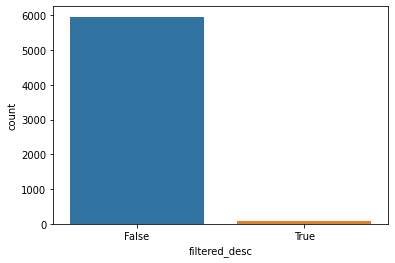

In [ ]:
sns.countplot((tot["filtered_desc"] == '' ))

In [ ]:
for index, row in tot.iterrows():
  if row['filtered_desc'] == '':
    tot.at[index, "filtered_desc"] = preProcessDescription(row['text'], stopwordsTotali, lang='eng')
    features = reduced_description(str(row['filtered_desc']))
    words = ''
    for each in features:
      words = words + ' ' + each
    tot.at[index, "wordnet_desc"] = words

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


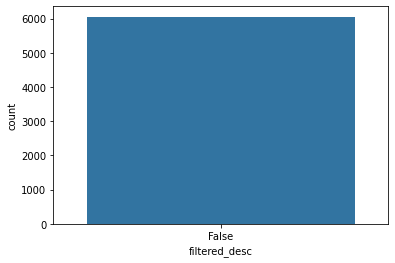

In [ ]:
sns.countplot((tot["filtered_desc"] == '' ))

In [ ]:
corpus = tot['filtered_desc']

###**B3**: *TOKENIZATION, SEQUENCING & PADDING*

In [ ]:
MAX_NB_WORDS = 30000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
seq_lens = [len(s) for s in sequences]

In [ ]:
sampleIndex = getRandomIndex(tot)
print('Sequenza descrizione numero %s: ' % sampleIndex)
for x in sequences[sampleIndex]:
  print('%d ' % x, end =' ')

Sequenza descrizione numero 5482: 
5  98  751  7  386  1475  879  751  117  1033  1282  5  72  117  751  3585  8951  117  1656  

In [ ]:
print('Traduzione della sequenza numero %d in parole: ' % sampleIndex)
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences[sampleIndex]])

Traduzione della sequenza numero 5482 in parole: 


'serata tema gin aspettiamo novita assaggiare anteprima gin base frutti ricetta serata cocktail base gin offriremo preparazioni base degustazioni'

Text(0.5, 1.0, 'Y documenti con X parole')

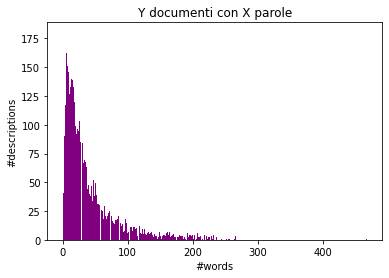

In [ ]:
%matplotlib inline

plt.hist(seq_lens, bins=500, color = 'purple')
plt.xlabel('#words')
plt.ylabel('#descriptions')
plt.title('Y documenti con X parole')

In [ ]:
media=np.mean(seq_lens)
print("average length: %0.1f" % media)
print("max length: %d" % max(seq_lens))
y = 0
for i in seq_lens:
  if i < media:
    y = y + 1

print("percentuale descrizioni di lunghezza inferiore ad average length: %d%%" % (int(y*100/len(seq_lens))))


average length: 42.1
max length: 468
percentuale descrizioni di lunghezza inferiore ad average length: 67%


La lunghezza media dei testi è di circa 65: eseguo il pad con massima lunghezza 70, valutando che la maggior parte delle descrizioni non supera quel numero di parole.

In [ ]:
MAX_SEQUENCE_LENGTH = 70

# pad sequences with 0s
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:', padded.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of data tensor: (6053, 70)
Found 32708 unique tokens.


In [ ]:
padded[sampleIndex].shape[0]

70

In [ ]:
preProcessDescription('techno rave party festa scuola',stopwordsTotali, MAX_SEQUENCE_LENGTH, tokenizer)

Traduzione della sequenza numero in parole: 



array([[145,  57,  87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0]], dtype=int32)

###**B4**: *RAPPRESENTAZIONE DEL TESTO A BASSO LIVELLO*

####**B4.1**: *ALTERNATIVA EMBEDDINGS VIA WORLD2VEC*


In [ ]:
# Download the models (1660MB)
word2vec_model300 = api.load('word2vec-google-news-300')

[=================================================-] 99.8% 1660.1/1662.8MB downloaded


In [ ]:
#word2vec_model300.save("/content/drive/MyDrive/Colab Notebooks/word2vec.bin")

In [ ]:
x_emb = []
for sentence in padded:
  print('sentence')
  print(sentence)
  sent_emb = [0 for k in range(300)] 
  
  num_tok = 0
  for tok in sentence:
    if tok != 0:
      word=list(word_index.keys())[list(word_index.values()).index(tok)]
      print('word: '+ word)
      try:
          emb = word2vec_model300.wv[word]
          sent_emb = [x + y for x, y in zip(sent_emb, emb)]
          num_tok = num_tok +1
      except:
          pass
  if num_tok != 0:
    final_sent_emb = [x / num_tok for x in sent_emb]         
  x_emb.append(final_sent_emb)
  

x_emb = np.array(x_emb)
with open('/content/drive/MyDrive/Colab Notebooks/embeddingsSafe.npy', 'wb') as f:
    np.save(f, x_emb)

sentence
[3003 9167 1201  575  567  822 2095 2535 2536    9    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
word: tombolata
word: calze
word: vincere
word: formula
word: panino
word: patatine
word: bibita
word: cartella
word: offriamo
word: prenotazione
sentence
[  6 882 319   5 131  36   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
word: ingresso
word: obbligo
word: consumazione
word: serata
word: disco
word: bar
sentence
[ 3185   173     5  1109   629   749 16558  1320  1177     2  1912 11621
  5149 16559   310   469    74

<ipython-input-49-174a115c7708>:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  emb = word2vec_model300.wv[word]


Output streaming troncato alle ultime 5000 righe.
word: grazie
word: progetto
word: archivio
word: film
word: luce
word: costruzione
word: archivio
word: dedicato
word: memorie
word: persone
word: vissuto
word: mondo
word: vita
word: trasformazioni
word: online
word: sito
word: dellarchivio
word: luce
word: tempo
word: flusso
word: sentiero
word: portare
word: luogo
word: frammenti
word: vita
word: persone
word: sentiero
word: riconosce
word: filo
word: guidare
word: percorre
word: labirinto
word: visita
word: sito
word: film
word: info
word: biglietti
sentence
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sentence
[ 1988   390   188    34     1    73     7   424    73    20  1464  1988
   205   134     2   225  5183   347  1444   639   138     1   143    20
    14  2049  1595  1305  7208     6   596    91    67    76  8662   435
   402   117   579    96    12  1193  1012  2136  2387  3254 

In [ ]:
'''with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'rb') as f:
    x_emb = np.load(f)
print(type(x_emb))
print(x_emb.shape)'''

"with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'rb') as f:\n    x_emb = np.load(f)\nprint(type(x_emb))\nprint(x_emb.shape)"

In [ ]:
x_emb.shape

(6053, 300)

In [ ]:
print(x_emb[sampleIndex])

[-8.56119792e-02  1.14610460e-03  1.59330368e-02  1.40896267e-01
 -2.23273383e-01 -3.76451280e-02 -9.02913411e-02 -1.48735894e-01
  4.26135593e-02  1.92789714e-01  6.02645874e-02 -1.68701172e-01
  2.06875271e-02  8.89909532e-02 -3.69059245e-02  9.81174045e-02
  4.19379340e-02  1.50499132e-01  1.31469727e-01 -1.38861762e-01
 -4.25889757e-03 -2.69639757e-02  5.22189670e-02 -5.50944010e-02
  1.27685547e-01 -2.76963976e-02 -2.45958116e-01  2.78428819e-01
 -4.56237793e-02  4.49964735e-03  1.63408067e-01 -1.08289931e-01
 -3.07481554e-02  2.61501736e-02 -4.37011719e-02 -2.50786675e-02
  1.18001302e-02 -8.39233398e-02  8.13462999e-02 -1.01137161e-01
  9.87794664e-03 -2.05803765e-01  4.65359158e-02  1.36108398e-02
 -1.89887153e-02 -1.27468533e-01 -1.53686523e-01 -9.81987847e-02
 -3.82486979e-03  6.68402778e-02 -2.12673611e-02  6.71929253e-02
  7.65787760e-02 -5.55284288e-02 -9.45036146e-02 -2.26508247e-02
  3.56445312e-02  1.21595595e-01 -9.76291233e-02 -1.80633545e-01
  6.07367622e-02 -3.66592

####**B4.2**: *ALTERNATIVA FEATURE EXTRACTION VIA RETE NEURALE*

In [ ]:
embedding_size = 1000

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_size, input_length=MAX_SEQUENCE_LENGTH))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

token_matrix = model.predict(padded)

190/190 [==============================] - 2s 9ms/step


####**B4.3**: *ALTERNATIVA VECTORIZATION VIA TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY*

In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(corpus)

##**C**: *CLASSIFICAZIONE*

In [ ]:
y = tot[['culture', 'music', 'food', 'fun']]

###**C1**: *SPLIT*

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#X_trainEmb,X_testEmb,y_trainEmb,y_testEmb = train_test_split(x_emb,y,test_size=0.25,random_state=42)

In [ ]:
X_trainTM,X_testTM,y_trainTM,y_testTM = train_test_split(token_matrix,y,test_size=0.25,random_state=42)

####**C1.1**: RIDUZIONE 

In [ ]:
pca = PCA (70)

reduced = pca.fit_transform(x_emb)

X_trainEmb,X_testEmb,y_trainEmb,y_testEmb = train_test_split(reduced,y,test_size=0.25,random_state=42)
reduced.shape

(6053, 70)

###**C2**: *CLASSIFICATORI*

Ora utilizzeremo la tecnica di classificazione a multipli riferimenti (OneVsRest) in quanto il nostro dataset risulta sbilanciato. È buona norma utilizzare questo tipo di classificazione sui dataset sbilanciati perché si addestra un classificatore per ogni classe: ogni classificatore è responsabile della distinzione tra la sua classe specifica e tutte le altre (appunto One vs Rest). Questo significa che ogni classificatore può concentrarsi sulle proprietà distintive della classe stessa

In [ ]:
classificatori = [OneVsRestClassifier, ClassifierChain, LabelPowerset]
estimatori =[DecisionTreeClassifier(),RandomForestClassifier(), SVC()]
#prova anche uno fra logistic reg e sdgclassifier
param_grid = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 5, 10],
    'estimator__min_samples_split': [2, 10],
    'estimator__min_samples_leaf': [1, 4]
}

In [ ]:
def atlas (estimatori, classificatori, x_train, x_test, y_train, y_test, parametri = None):
  results = []
  for ml in classificatori:
    for each in estimatori:
      clf = ml(each)
      if (parametri is None):
          clf.fit(x_train, y_train)
          y_pred = clf.predict(x_test)
      else:
        try:
          grid_search = GridSearchCV(clf, parametri, cv=5, scoring='accuracy')
          grid_search.fit(x_train, y_train)
          best_clf = grid_search.best_estimator_
          y_pred = best_clf.predict(x_test)
        except:
          clf.fit(x_train, y_train)
          y_pred = clf.predict(x_test)
      print('\n\n')
      print(str(ml) + ' con ' + str(each) + ':\n\n')
      try:
        print('Accuracy: %0.5f' % accuracy_score(y_test,y_pred))
      except:
        try:
          print('Accuracy: %0.5f' % accuracy_score(y_test,y_pred.toarray()))
        except:
          print('skip')
          continue
      try:
        print('Loss di hamming: %0.5f' % hamming_loss(y_test,y_pred))
      except:
        try:
          print('Loss di hamming: %0.5f' % hamming_loss(y_test,y_pred.toarray()))
        except:
          print('skip')
          continue
      try:
        print('Label ranking Average-Precision: %0.5f' % label_ranking_average_precision_score(y_test,y_pred))
      except:
        try:
          print('Label ranking Average-Precision: %0.5f' % label_ranking_average_precision_score(y_test,y_pred.toarray()))
        except:
          print('skip')
          continue
      results.append([str(ml), str(each), y_pred])
  return results

In [ ]:
print('Eseguo classificazione su Embeddings (Word2Vec)\n')
risultatiEmb = atlas(estimatori, classificatori, X_trainEmb, X_testEmb, y_trainEmb, y_testEmb, param_grid)

Eseguo classificazione su Embeddings (Word2Vec)




<class 'sklearn.multiclass.OneVsRestClassifier'> con DecisionTreeClassifier():


Accuracy: 0.37517
Loss di hamming: 0.20608
Label ranking Average-Precision: 0.74728



<class 'sklearn.multiclass.OneVsRestClassifier'> con RandomForestClassifier():


Accuracy: 0.48481
Loss di hamming: 0.15852
Label ranking Average-Precision: 0.80220



<class 'sklearn.multiclass.OneVsRestClassifier'> con SVC():


Accuracy: 0.51982
Loss di hamming: 0.14894
Label ranking Average-Precision: 0.81137



<class 'sklearn.multioutput.ClassifierChain'> con DecisionTreeClassifier():


Accuracy: 0.35601
Loss di hamming: 0.23861
Label ranking Average-Precision: 0.74072



<class 'sklearn.multioutput.ClassifierChain'> con RandomForestClassifier():


Accuracy: 0.50793
Loss di hamming: 0.16017
Label ranking Average-Precision: 0.81851



<class 'sklearn.multioutput.ClassifierChain'> con SVC():


Accuracy: 0.53303
Loss di hamming: 0.15274
Label ranking Average-Precision

In [ ]:
print('Eseguo classificazione su matrice di token (feature Neural Network)\n')
risultatiNN = atlas(estimatori, classificatori, X_trainTM, X_testTM, y_trainTM, y_testTM, param_grid)

Eseguo classificazione su matrice di token (feature Neural Network)




<class 'sklearn.multiclass.OneVsRestClassifier'> con DecisionTreeClassifier():


Accuracy: 0.18296
Loss di hamming: 0.27824
Label ranking Average-Precision: 0.68604



<class 'sklearn.multiclass.OneVsRestClassifier'> con RandomForestClassifier():


Accuracy: 0.19683
Loss di hamming: 0.31011
Label ranking Average-Precision: 0.67212



<class 'sklearn.multiclass.OneVsRestClassifier'> con SVC():


Accuracy: 0.18494
Loss di hamming: 0.26998
Label ranking Average-Precision: 0.69006



<class 'sklearn.multioutput.ClassifierChain'> con DecisionTreeClassifier():


Accuracy: 0.20145
Loss di hamming: 0.35552
Label ranking Average-Precision: 0.65676



<class 'sklearn.multioutput.ClassifierChain'> con RandomForestClassifier():


Accuracy: 0.20013
Loss di hamming: 0.35518
Label ranking Average-Precision: 0.65665



<class 'sklearn.multioutput.ClassifierChain'> con SVC():


Accuracy: 0.20674
Loss di hamming: 0.38061
Label ranki

In [ ]:
print('Eseguo classificazione su vettori Tf-Idf\n')
risultatiTfIdf = atlas(estimatori, classificatori, X_train, X_test, y_train, y_test, param_grid

Eseguo classificazione su vettori Tf-Idf




<class 'sklearn.multiclass.OneVsRestClassifier'> con DecisionTreeClassifier():


Accuracy: 0.53501
Loss di hamming: 0.14630
Label ranking Average-Precision: 0.81025



<class 'sklearn.multiclass.OneVsRestClassifier'> con RandomForestClassifier():


Accuracy: 0.61559
Loss di hamming: 0.11559
Label ranking Average-Precision: 0.86212



<class 'sklearn.multiclass.OneVsRestClassifier'> con SVC():


Accuracy: 0.61691
Loss di hamming: 0.11179
Label ranking Average-Precision: 0.86076



<class 'sklearn.multioutput.ClassifierChain'> con DecisionTreeClassifier():


Accuracy: 0.54029
Loss di hamming: 0.15621
Label ranking Average-Precision: 0.82335



<class 'sklearn.multioutput.ClassifierChain'> con RandomForestClassifier():


Accuracy: 0.66843
Loss di hamming: 0.10585
Label ranking Average-Precision: 0.88274



<class 'sklearn.multioutput.ClassifierChain'> con SVC():


Accuracy: 0.67305
Loss di hamming: 0.10568
Label ranking Average-Precision: 0.888

####**C2.1**: *VARIOUS PLOTS*

<class 'sklearn.multioutput.ClassifierChain'> + SVC():



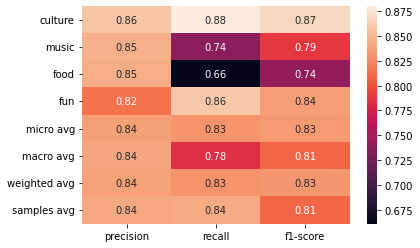

In [ ]:
print(risultatiEmb[5][0] + ' + ' + risultatiEmb[5][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiEmb[5][2], zero_division=1, output_dict=True, target_names=['culture', 'music','food','fun'])).iloc[:-1, :].T, annot=True, linecolor='purple')

<class 'skmultilearn.problem_transform.lp.LabelPowerset'> + SVC():



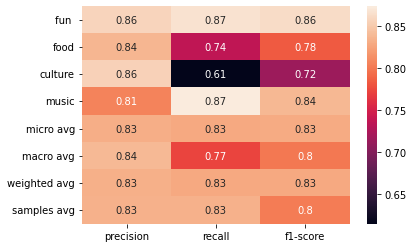

In [ ]:
print(risultatiEmb[8][0] + ' + ' + risultatiEmb[8][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiEmb[8][2], zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

<class 'sklearn.multiclass.OneVsRestClassifier'> + DecisionTreeClassifier():



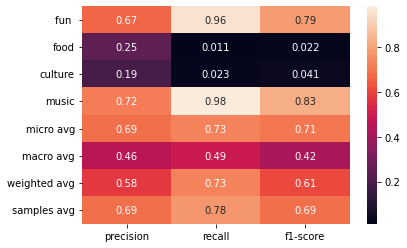

In [ ]:
print(risultatiNN[0][0] + ' + ' + risultatiNN[0][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiNN[0][2], zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

<class 'skmultilearn.problem_transform.lp.LabelPowerset'> + SVC():



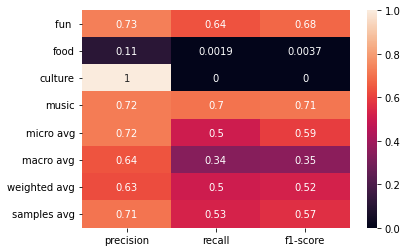

In [ ]:
print(risultatiNN[8][0] + ' + ' + risultatiNN[8][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiNN[8][2], zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

<class 'sklearn.multioutput.ClassifierChain'> + RandomForestClassifier():



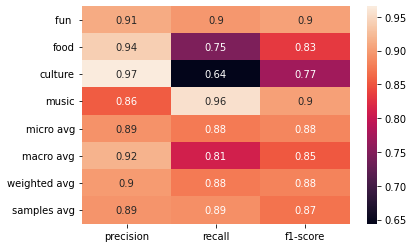

In [ ]:
print(risultatiTfIdf[4][0] + ' + ' + risultatiTfIdf[4][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiTfIdf[4][2], zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

<class 'skmultilearn.problem_transform.lp.LabelPowerset'> + SVC():



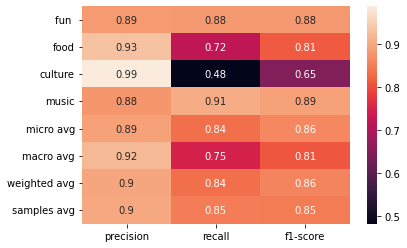

In [ ]:
print(risultatiTfIdf[8][0] + ' + ' + risultatiTfIdf[8][1] + ':\n')
sns.heatmap(pd.DataFrame(classification_report(y_test,risultatiTfIdf[8][2], zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

###**C3**: TRASFORMAZIONE DATASET IN VALORI DISCRETI

Procediamo con il trasformare il dataset in valori discreti (da 0 a 1) per mezzo del Logistic Regression Classifier.

N.B. La somma di probabilità per ogni riga è 1

In [ ]:
target_variables = ["culture", "music", "food", "fun"]

models = []
for target in target_variables:
    clf = LogisticRegression(random_state=0)
    clf.fit(X, tot[target])
    models.append(clf)

probabilities = np.zeros((tot.shape[0], len(target_variables)))
for i, clf in enumerate(models):
    probabilities[:, i] = clf.predict_proba(vectorizer.fit_transform(tot["filtered_desc"]))[:, 1]

probabilities /= probabilities.sum(axis=1, keepdims=True)

# Creare un nuovo dataset con le probabilità
new_df = pd.DataFrame(probabilities, columns=target_variables)

new_df["filtered_desc"] = tot["filtered_desc"]
new_df["wordnet_desc"] = tot["wordnet_desc"]
new_df["text"] = tot["text"]
new_df["id"]=tot["id"].astype(str)

In [ ]:
new_df

,culture,music,food,fun,filtered_desc,wordnet_desc,text,id
0,0.262411,0.064499,0.062840,0.610250,tombolata calze vincere formula panino patatin...,booking french_fries briefcase soft_drink rul...,Martedi 05 gennaio super tombolata al Barfly!\...,1000187186721956
1,0.213070,0.371455,0.036840,0.378635,ingresso obbligo consumazione serata disco bar,responsibility evening entrance consummation ...,"Ingresso free senza obbligo di consumazione,se...",100731190460200
2,0.321324,0.294456,0.029148,0.355073,celebra donna serata eccezione magia sax jazzi...,arcade booking chalice man queen include rhes...,"Giovedi 8 Marzo, Napulitanata ""celebra la donn...",1014507045355357
3,0.364235,0.301999,0.007597,0.326169,presentare napoolyn resilienza records resilie...,store kind turn range North_Atlantic_Treaty_O...,yn e lieta di presentare\n\nNapoolyn x Resilie...,1015563648832823
4,0.262902,0.240395,0.022302,0.474401,serata ritorno palco biergrube porteremo anni ...,tribute stillness hear booking evening headli...,Serata live \nVENERDI' 18 MARZO \nUn piacevole...,1021806692027608
...,...,...,...,...,...,...,...,...
6048,0.373870,0.447138,0.008919,0.170073,club trio chitarra solista chitarra gattone co...,project jazz symbol clubhouse film agent guit...,Hot Club Roma Trio\n\nMoreno Viglione chitarra...,996956944037551
6049,0.635756,0.069304,0.014605,0.280335,presentazione libro editore dialoga autore pos...,fear demonstration location surprise composer...,"Presentazione del libro:\n ""Tasmania"" (Einaudi...",997255064998935
6050,0.470842,0.332995,0.013837,0.182326,occasione giornate patrimonio ore museo parco ...,ore concert fa green pass editorship occasion...,In occasione delle GIORNATE EUROPEE DEL PATRIM...,997824980996408
6051,0.445390,0.079678,0.016303,0.458629,danzare giorno amici tagga locandina lm scuola...,winch hop clubhouse acting dance dancing lume...,Vieni a Danzare gratuitamente per un giorno co...,998364400508276


In [ ]:
tot

,culture,music,food,fun,id,text,filtered_desc,wordnet_desc
0,0,0,0,1,1000187186721956,Martedi 05 gennaio super tombolata al Barfly!\...,tombolata calze vincere formula panino patatin...,booking french_fries briefcase soft_drink rul...
1,0,1,0,1,100731190460200,"Ingresso free senza obbligo di consumazione,se...",ingresso obbligo consumazione serata disco bar,responsibility evening entrance consummation ...
2,1,1,0,1,1014507045355357,"Giovedi 8 Marzo, Napulitanata ""celebra la donn...",celebra donna serata eccezione magia sax jazzi...,arcade booking chalice man queen include rhes...
3,1,1,0,1,1015563648832823,yn e lieta di presentare\n\nNapoolyn x Resilie...,presentare napoolyn resilienza records resilie...,store kind turn range North_Atlantic_Treaty_O...
4,0,0,0,1,1021806692027608,Serata live \nVENERDI' 18 MARZO \nUn piacevole...,serata ritorno palco biergrube porteremo anni ...,tribute stillness hear booking evening headli...
...,...,...,...,...,...,...,...,...
6048,1,1,0,0,996956944037551,Hot Club Roma Trio\n\nMoreno Viglione chitarra...,club trio chitarra solista chitarra gattone co...,project jazz symbol clubhouse film agent guit...
6049,1,0,0,0,997255064998935,"Presentazione del libro:\n ""Tasmania"" (Einaudi...",presentazione libro editore dialoga autore pos...,fear demonstration location surprise composer...
6050,1,1,0,0,997824980996408,In occasione delle GIORNATE EUROPEE DEL PATRIM...,occasione giornate patrimonio ore museo parco ...,ore concert fa green pass editorship occasion...
6051,1,0,0,1,998364400508276,Vieni a Danzare gratuitamente per un giorno co...,danzare giorno amici tagga locandina lm scuola...,winch hop clubhouse acting dance dancing lume...


In [ ]:
# Prevedi le etichette per un nuovo evento

new_events = ['concerto rock stasera', 'partita di calcio con amici', 'cena al lume di candela', 'presentazione del libro']
for each in new_events:
  X_new = vectorizer.transform([each])

  y_pred_fun = models[0].predict_proba(X_new)[0][1]
  y_pred_food = models[1].predict_proba(X_new)[0][1]
  y_pred_culture = models[2].predict_proba(X_new)[0][1]
  y_pred_music = models[3].predict_proba(X_new)[0][1]

  # Confronta i risultati per evincere la categoria di appartenenza dell'evento
  probs = [y_pred_fun, y_pred_food, y_pred_culture, y_pred_music]
  pred_class = ['culture', 'music', 'food', 'fun'][np.argmax(probs)]
  print('"'+each+'"' + f" belongs to the {pred_class} class with a probability of {np.max(probs):.2f}")

"concerto rock stasera" belongs to the music class with a probability of 0.84
"partita di calcio con amici" belongs to the fun class with a probability of 0.86
"cena al lume di candela" belongs to the food class with a probability of 0.51
"presentazione del libro" belongs to the culture class with a probability of 0.98


##**D**: *RETE NEURALE*

In [ ]:
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(256, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

def evaluate_model(X_train, y_train, X_test, y_test):
  results = list()
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  model = get_model(X_train.shape[1], y_train.shape[1])
  fit=model.fit(X_train, y_train, verbose=1, epochs=60)
  yhat = model.predict(X_test)
  acc = accuracy_score(y_test.round(), yhat.round())
  print('>%.3f' % acc)
  results.append(acc)
  print(yhat)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
  # Plot training and validation accuracy
  ax1.plot(fit.history['accuracy'])
  ax1.set_title('Model Accuracy')
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'validation'], loc='upper left')
  
  # Plot training and validation loss
  ax2.plot(fit.history['loss'])
  ax2.set_title('Model Loss')
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'validation'], loc='upper left')
  
  plt.show()
  return results,model

Epoch 1/60
142/142 [==============================] - 2s 3ms/step - loss: 0.5170 - accuracy: 0.5818
Epoch 2/60
142/142 [==============================] - 0s 3ms/step - loss: 0.3964 - accuracy: 0.5900
Epoch 3/60
142/142 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.5920
Epoch 4/60
142/142 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.6136
Epoch 5/60
142/142 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.6255
Epoch 6/60
142/142 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.6261
Epoch 7/60
142/142 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.6321
Epoch 8/60
142/142 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.6411
Epoch 9/60
142/142 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.6466
Epoch 10/60
142/142 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.6468

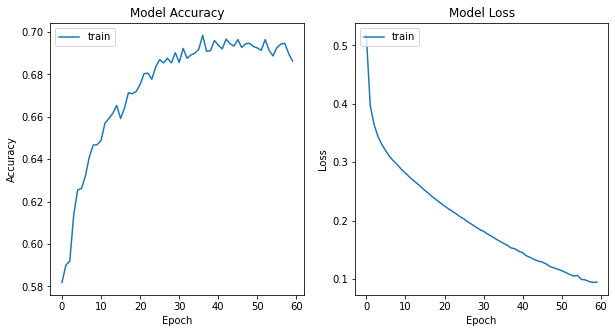

Accuracy Embeddings word2vec: 0.506 (0.000)


In [ ]:
# evaluate model
#results,model = evaluate_model(X_train, y_train, X_test, y_test)
# summarize performance
#print('Accuracy tfidf: %.3f (%.3f)' % (mean(results), std(results)))

# evaluate model
#resultsTM,modelTM = evaluate_model(X_trainTM, y_trainTM, X_testTM, y_testTM)
# summarize performance
#print('Accuracy matrice di token NN: %.3f (%.3f)' % (mean(resultsTM), std(resultsTM)))

# evaluate model
resultsEmb,modelEmb = evaluate_model(X_trainEmb, y_trainEmb, X_testEmb, y_testEmb)
# summarize performance
print('Accuracy Embeddings word2vec: %.3f (%.3f)' % (mean(resultsEmb), std(resultsEmb)))

##**E**: *LOGICHE FUZZY*

Vogliamo tramite regole fuzzy determinare se un evento si svolgerà di notte o meno

In [ ]:
from skfuzzy import control as ctrl
from fuzzywuzzy import fuzz

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def is_night_event(event_vector, night_vector, threshold=25):
  similarity = fuzz.token_set_ratio(event_vector, night_vector)
  if similarity >= threshold:
    return True
  else:
    return False

In [ ]:
def categorize_text(df, string):
  words = string.split()
  result = [0, 0, 0, 0]
  count = 0
  for index, row in tot.iterrows():
    for word in words:
      if word in row['text']:
        result[0] = result[0] + row['fun']
        result[1] = result[1] + row['food']
        result[2] = result[2] + row['culture']
        result[3] = result[3] + row['music']
        count = count + 1
        break
  result[0] = result[0] / count
  result[1] = result[1] / count
  result[2] = result[2] / count
  result[3] = result[3] / count
  return result
#questi rappresentano i valori medi su cui definiremo la regola
valoriNotte=categorize_text(tot,'notte')
valoriNotte

[0.9403508771929825,
 0.24210526315789474,
 0.6807017543859649,
 0.6175438596491228]

In [ ]:
def get_event_vector(event_tuple):
    event_vector = []
    for header in ['fun', 'food', 'culture', 'music']:
        event_vector.append(event_tuple[header])
    return event_vector

In [ ]:
event_vector=get_event_vector(new_df.iloc[0])
event_vector

[0.6102501378826924,
 0.06283969933125853,
 0.26241114750940653,
 0.06449901527664262]

In [ ]:
result = is_night_event(event_vector, valoriNotte)
if result:
  print("L'evento è di notte")
else:
  print("L'evento non è di notte")

L'evento è di notte


In [ ]:
tag=[]
for index, row in new_df.iterrows():
    event_vector=get_event_vector(new_df.iloc[index])
    tag.append(is_night_event(event_vector, valoriNotte))

new_df['atNight'] = tag

In [ ]:
new_df

,culture,music,food,fun,filtered_desc,wordnet_desc,text,id,atNight
0,0.262411,0.064499,0.062840,0.610250,tombolata calze vincere formula panino patatin...,booking french_fries briefcase soft_drink rul...,Martedi 05 gennaio super tombolata al Barfly!\...,1000187186721956,True
1,0.213070,0.371455,0.036840,0.378635,ingresso obbligo consumazione serata disco bar,responsibility evening entrance consummation ...,"Ingresso free senza obbligo di consumazione,se...",100731190460200,False
2,0.321324,0.294456,0.029148,0.355073,celebra donna serata eccezione magia sax jazzi...,arcade booking chalice man queen include rhes...,"Giovedi 8 Marzo, Napulitanata ""celebra la donn...",1014507045355357,True
3,0.364235,0.301999,0.007597,0.326169,presentare napoolyn resilienza records resilie...,store kind turn range North_Atlantic_Treaty_O...,yn e lieta di presentare\n\nNapoolyn x Resilie...,1015563648832823,True
4,0.262902,0.240395,0.022302,0.474401,serata ritorno palco biergrube porteremo anni ...,tribute stillness hear booking evening headli...,Serata live \nVENERDI' 18 MARZO \nUn piacevole...,1021806692027608,True
...,...,...,...,...,...,...,...,...,...
6048,0.373870,0.447138,0.008919,0.170073,club trio chitarra solista chitarra gattone co...,project jazz symbol clubhouse film agent guit...,Hot Club Roma Trio\n\nMoreno Viglione chitarra...,996956944037551,True
6049,0.635756,0.069304,0.014605,0.280335,presentazione libro editore dialoga autore pos...,fear demonstration location surprise composer...,"Presentazione del libro:\n ""Tasmania"" (Einaudi...",997255064998935,False
6050,0.470842,0.332995,0.013837,0.182326,occasione giornate patrimonio ore museo parco ...,ore concert fa green pass editorship occasion...,In occasione delle GIORNATE EUROPEE DEL PATRIM...,997824980996408,True
6051,0.445390,0.079678,0.016303,0.458629,danzare giorno amici tagga locandina lm scuola...,winch hop clubhouse acting dance dancing lume...,Vieni a Danzare gratuitamente per un giorno co...,998364400508276,True


##**F**: *RAPPRESENTAZIONE DELLA CONOSCENZA*

###**F1**: *ONTOLOGIA: WORDNET*

In [ ]:
vectorizerTfIdf=TfidfVectorizer()
vectorTfIdf=vectorizerTfIdf.fit_transform(new_df['wordnet_desc'])
#X_train1, X_test1 = train_test_split(vectorTfIdf, test_size=0.2, random_state=42) 

In [ ]:
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(vectorTfIdf)

KMeans(n_clusters=5)

In [ ]:
# But you could fit the idf_df instea
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizerTfIdf.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: evening ore grade beer clubhouse
Cluster 1: menu dinner wine booking evening
Cluster 2: music guitar voice rock_ _roll
Cluster 3: disk_jockey bent drink entrance information
Cluster 4: ore demonstration world course attention


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cluster_labels=km.labels_
len(cluster_labels)

6053

In [ ]:
descrizione='pizza a pranzo con vista dalle terrazze'
predict_closest_clusters(new_df, descrizione, km, vectorTfIdf, vectorizerTfIdf)

Il cluster più vicino è il cluster numero:  1
Le sue parole più rilevanti sono: menu, dinner, wine, booking, evening
I 5 eventi più importanti nel dataset sono:
Mercoledi 23 dicembre 2020 un pranzo dedicato solo ed esclusivamente alla pizza e a tutte le sue varianti!

Tutte le pizze del nostro menu!

Solo per veri #pizzalovers !!!
 ONE SHOT 
 
 Dj BIG FAB & Alex Pala 
 Hip Hop/Trap/Dancehall - House/Deep House
 START ore 22:30 - Free Entry 

#lamojiteriaeinaudi  #piudi100mojito
VENERDI 12 DICEMBRE 
Noite do caldeiraO - DJ Victor

SABATO 13 DICembre 
RIOSAMBA 
FEIJOADA DA LILIAN- DJ Serginho L.

DOMENICA 14 dicEMBRE  
Eddy Coimbra e Ze Carioca
Dj Teddy
Looking for somewhere to Celeberate your New Years..?...then look no further the Abbey is here for you! 

Come on down and enjoy our tasty new Special menu, (if this isnt for you then not to worry we will be still running our standard menu.
Menu will be listed on our events page)

We will be starting around 6pm and serving till late. Grea

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


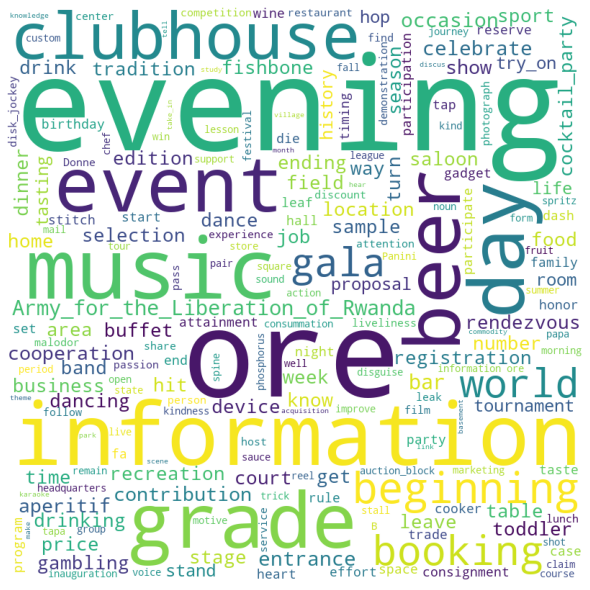

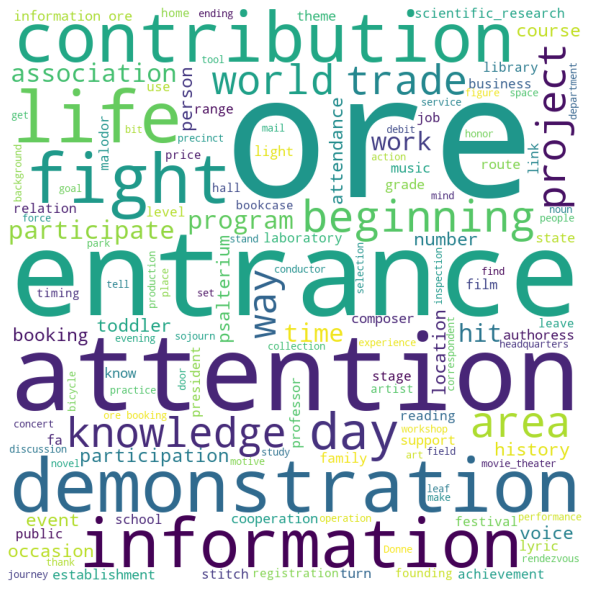

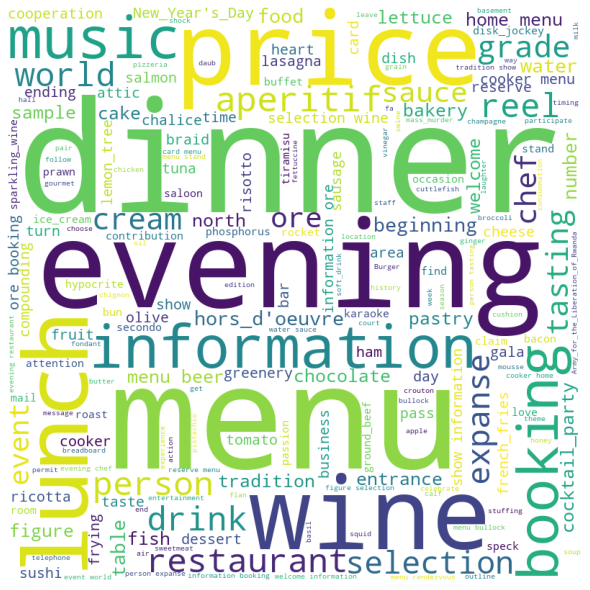

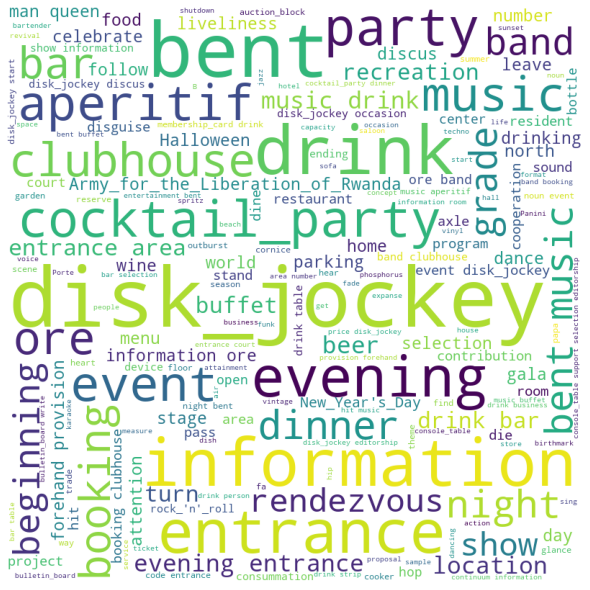

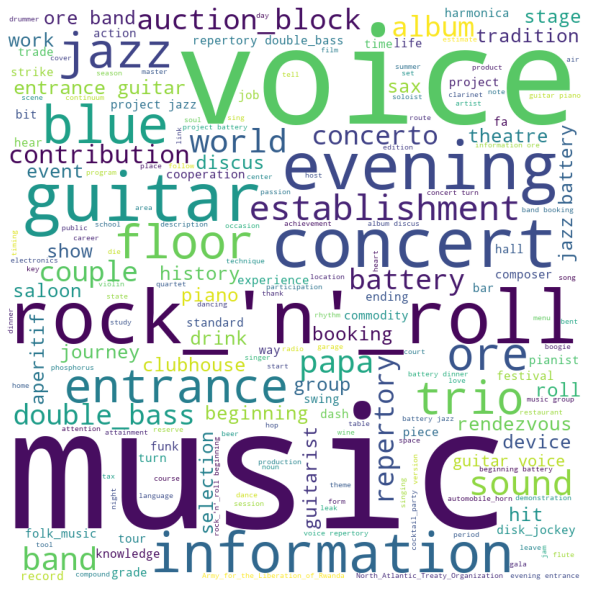

In [ ]:
labels=km.labels_
cluster_labels = np.unique(labels)
cluster_sizes = [(labels == c).sum() for c in cluster_labels]
sizes_idx = np.argsort(cluster_sizes)[::-1][:5]
X1=new_df['wordnet_desc']
# Plot dei risultati
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(X1)[mask]
    text = " ".join(descrizioni_c)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwordsTotali, 
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

###**F2**: RECOMMENDER SYSTEM CONTENT-BASED

In [ ]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

def content_based_recommendation(event_index, content_matrix, num_recommendations):
    similarity = np.zeros(content_matrix.shape[0])
    for i in range(len(similarity)):
        similarity[i] = cosine_similarity(content_matrix[event_index], content_matrix[i])

    recommendation_indices = np.argsort(similarity)[::-1][1:num_recommendations+1]
    return recommendation_indices

In [ ]:
num_events = new_df.shape[0]
num_recommendations = 5
recommendation_matrix = np.zeros((num_events, num_recommendations), dtype=int)
content_columns = ["culture", "music", "food", "fun"]
content_matrix = new_df[content_columns].values
for i in range(num_events):
    recommended_indices = content_based_recommendation(i, content_matrix, num_recommendations)
    recommendation_matrix[i, :] = recommended_indices

#np.savetxt("recommendation_matrix.csv", recommendation_matrix, delimiter=",", fmt='%d')
recommendation_matrix

array([[5583, 1672,  646, 4636, 5092],
       [1547, 1992, 5464, 2728, 1348],
       [4204,  137, 2428, 3788, 1909],
       ...,
       [2052, 1935, 2599, 4661,  254],
       [4818, 3211, 2328,  438, 5584],
       [3238, 3830, 2312, 4847, 4675]])

In [ ]:
print('EVENTO PRESO IN ESAME: ')
ix = getRandomIndex(new_df)
print(new_df['text'][ix])
count = 1
for each in recommendation_matrix[ix]:
  print('EVENTO CONSIGLIATO NUMERO ' + str(count) + ': ')
  print(new_df['text'][each])
  print('\n\n')
  count = count + 1

EVENTO PRESO IN ESAME: 
...Milonga La Mirada 
SABATO 5 novembre dalle 22 
GRAN MILONGA TRADICIONAL 

Torna in consolle il musicalizador Andy Cassina tdj.

MILONGA LA MIRADA da 22 anni una tra le piu' storiche milonghe di Roma.
Milonga stabile.

Milonga di puro tango tradizionale..
Ballerete su pista in vero parquet,in una milonga intima,raffinata ed accogliente con tavolini a bordo pista,luci soffuse al punto giusto per mirada e cabeceo..

...e come da tradizione...verranno offerti cornetti per tutti!!!

Alle 21 Special class di tango  con i maestri LUCAS AMIEIJIERAS Y YANINA BASSI.
(Livello interm/avanzato).

Ingresso in Milonga con drink;14 euro  
Special class +milonga con drink;24 euro 
solo special class;15 euro 

...prima e durante la milonga sara' possibile cenare con panini,toast e piadine espresse..

Si balla su pista in vero parquet!!!

Location climatizzata 
Bar e caffetteria 
Tavoli bordo pista
Servizio guardaroba
Wi-Fi zone 

Facile parcheggio!!!

Tessera gratuita 

E grad